In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M-SI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M-SI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M-SI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Read in the data
df = pd.read_excel("Data Clustering.xlsx")

In [10]:
# set df to array for processing
array = df['Teks'].to_numpy()

In [11]:
# Inisialisasi objek WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Inisialisasi set stopwords
stop_words_default = set(stopwords.words('indonesian'))
stop_words_additional = set(["aku", "malam", "dok","selamat","halo",",","-","ya","terimakasih","terimaksih"])
stop_words = stop_words_default.union(stop_words_additional)

# Iterasi melalui baris dari array untuk indeks baris 0 hingga 28 (29 baris)
for index, row in enumerate(array[0:29]):
    tokens = word_tokenize(row.lower())
    
    # Menghapus semua tanda baca dari tokens
    tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]
    
    # Menghapus semua angka dari tokens
    tokens_without_numbers = [word for word in tokens_without_punctuation if not word.isdigit()]
    
    # Lematisasi kata-kata
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_without_numbers]
    
    # Filtering kata-kata berdasarkan stop words
    filtered_words = [word for word in lemmatized_words if word not in stop_words]
    
    print(f"Baris {index + 1}: {', '.join(filtered_words)}")


Baris 1: test, gula, darah, puasa, makan, jam, mengambil, te, gula, darah, jam, pp, normal, gulah, darah, puasa, gula, darah, jam, pp, terima, kasih
Baris 2: dokter, minggu, gampang, kencing, minum, kencing, 5-8, kali, kali, kondisi, kencing, normal, putih, bau, berdarah, mengkonsumsi, obat2, merokok, minum, minuman, normal, kecuali, intensitas, kencing, nya, uda, senam, kegel, yg, dmn, intensitas, kencing, bantu, olahraga, jogging, tp, tdk, berpengaruh, mohon, bantuanya, dokter, terimah, kasih
Baris 3: pria, berusia, cek, hba1c, hasil, dokter, diberika, obat, metformin, mg, 2x1, .., disiplin, minum, obat, sebulan, cek, hba1c, hasilnya, 5,6, gdp, 122gula, darah, jam, 151pertanyaan, koq, hba1c, turun, .., dokter, obat, .., aman, kah, dokter, bhwa, menderita, penyakit, gula/diabetes, dikatakn, hnya, sitokine, sitokine, .., mohon, detail, terima, kasih
Baris 4: izin, nenek, penyakit, diabetes, 20th, mengkonsumsi, obat, obat-obatan, konsumsi, dibeli, meng-copy, resep, dokter, dosis, obat, 

In [12]:
# Membuat vektor TF-IDF dari kata-kata yang sudah difilter
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_words)

# Melakukan reduksi dimensi menggunakan PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X.toarray())

# Deklarasi Kmeans clustering dengan 5 cluster
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Menghitung margin
margin = np.sum(np.min(kmeans.transform(X), axis=1)) / X.shape[0]

# Menampilkan hasil cluster dan margin
clusters = kmeans.labels_
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for j, cluster in enumerate(clusters):
        if cluster == i:
            print(f"  - {filtered_words[j]}")
print(f"Margin: {margin}")

Cluster 0:
  - bedanya
  - ulkus
  - berbeda
Cluster 1:
  - diabetik
  - diabetik
Cluster 2:
  - abs
Cluster 3:
  - dimana
Cluster 4:
  - aja
Margin: 0.30618621784789724


C:\Users\M-SI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


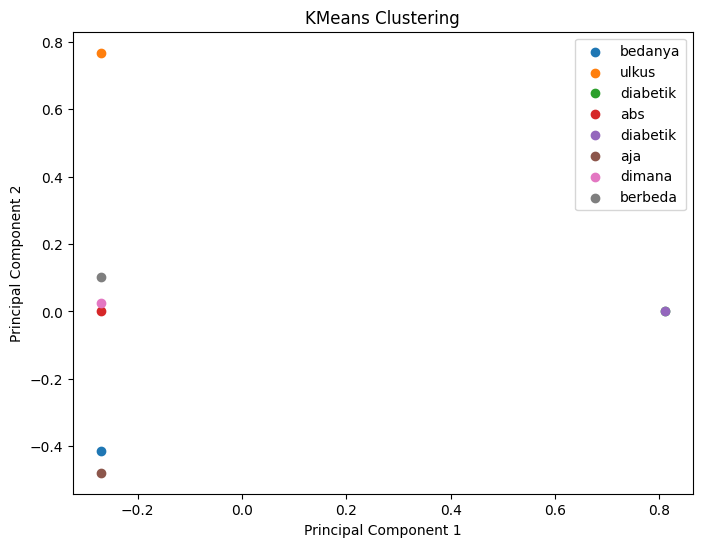

In [13]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))
for i, word in enumerate(filtered_words):
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], label=word)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()